<a href="https://colab.research.google.com/github/Decollabs/analise_airbnb_ny/blob/main/Andre_Brandao_Analisando_os_Dados_do_Airbnb(Nova_Iorque).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - Nova Iorque

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="40%" src="https://files.tecnoblog.net/wp-content/uploads/2021/11/airbnb.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Nova Iorque, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2023-06-05/visualisations/listings.csv")

## Análise dos Dados
Antes de começar a análise dos dados é muito importante deixarmos claro oque cada variável da nossa tabela significa. Isso pode ser visto na listagem abaixo ou ainda no próprio site do *Inside Airbnb* cujo links está disponibilizado logo em seguida.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - número de reviews nos ultimos 12 meses
* `license` - número de licença ou número de registro


Dicionário de variáveis disponibilizado pelo próprio site: https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=1322284596

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5121,Rental unit in Brooklyn · ★4.52 · 1 bedroom · ...,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.29,2,0,0,NaN
1,2595,Rental unit in New York · ★4.68 · Studio · 1 b...,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240,30,49,2022-06-21,0.30,3,325,1,NaN
2,14991,Rental unit in New York · ★4.93 · 1 bedroom · ...,59023,Bianca,Manhattan,Lower East Side,40.72207,-73.98976,Private room,120,5,22,2023-05-14,0.14,1,268,3,NaN
3,5136,Rental unit in Brooklyn · ★5.0 · 2 bedrooms · ...,7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,276,21,3,2022-08-10,0.03,1,275,1,NaN
4,59709,Rental unit in New York · ★4.77 · 2 bedrooms ·...,186084,Ricardo & Ashlie,Manhattan,Chinatown,40.71780,-73.99320,Entire home/apt,325,7,69,2023-04-28,0.47,1,38,23,NaN


A primeira informação relevante que devemos levantar é o tamanho da tabela a qual vamos operar para termos noção do tamanho do problema.

In [ ]:
# identificar o volume de dados do DataFrame
print('Dimensões da tabela: ', '\nColunas(variáveis):',df.shape[1], '\nLinhas:' ,df.shape[0])

Dimensões da tabela:  
Colunas(variáveis): 18 
Linhas: 43566


Além das dimensoes da tabela, é muito importante verificarmos os tipos de dados que estamos lidando, a seguir podemos conferir estas informações.

In [ ]:
# verificar os tipos de dados de cada coluna da tabela
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

Outra informação relevante que devemos levantar diz respeito à porcentagem de valores ausentes que temos para cada variável da nossa tabela.

Obs: Valores ausentes são aqueles que existem porém não carregam consigo nenhuma informação.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
round((df.isnull().sum()/df.shape[0]).sort_values(ascending=False),2)

license                           1.00
reviews_per_month                 0.24
last_review                       0.24
host_name                         0.00
minimum_nights                    0.00
number_of_reviews_ltm             0.00
availability_365                  0.00
calculated_host_listings_count    0.00
number_of_reviews                 0.00
id                                0.00
name                              0.00
room_type                         0.00
longitude                         0.00
latitude                          0.00
neighbourhood                     0.00
neighbourhood_group               0.00
host_id                           0.00
price                             0.00
dtype: float64

Neste primeiro momento vamos fazer o traçado das distribuições das variáveis numéricas do *dataset* para ver de maneira gráfica como elas se comportam.

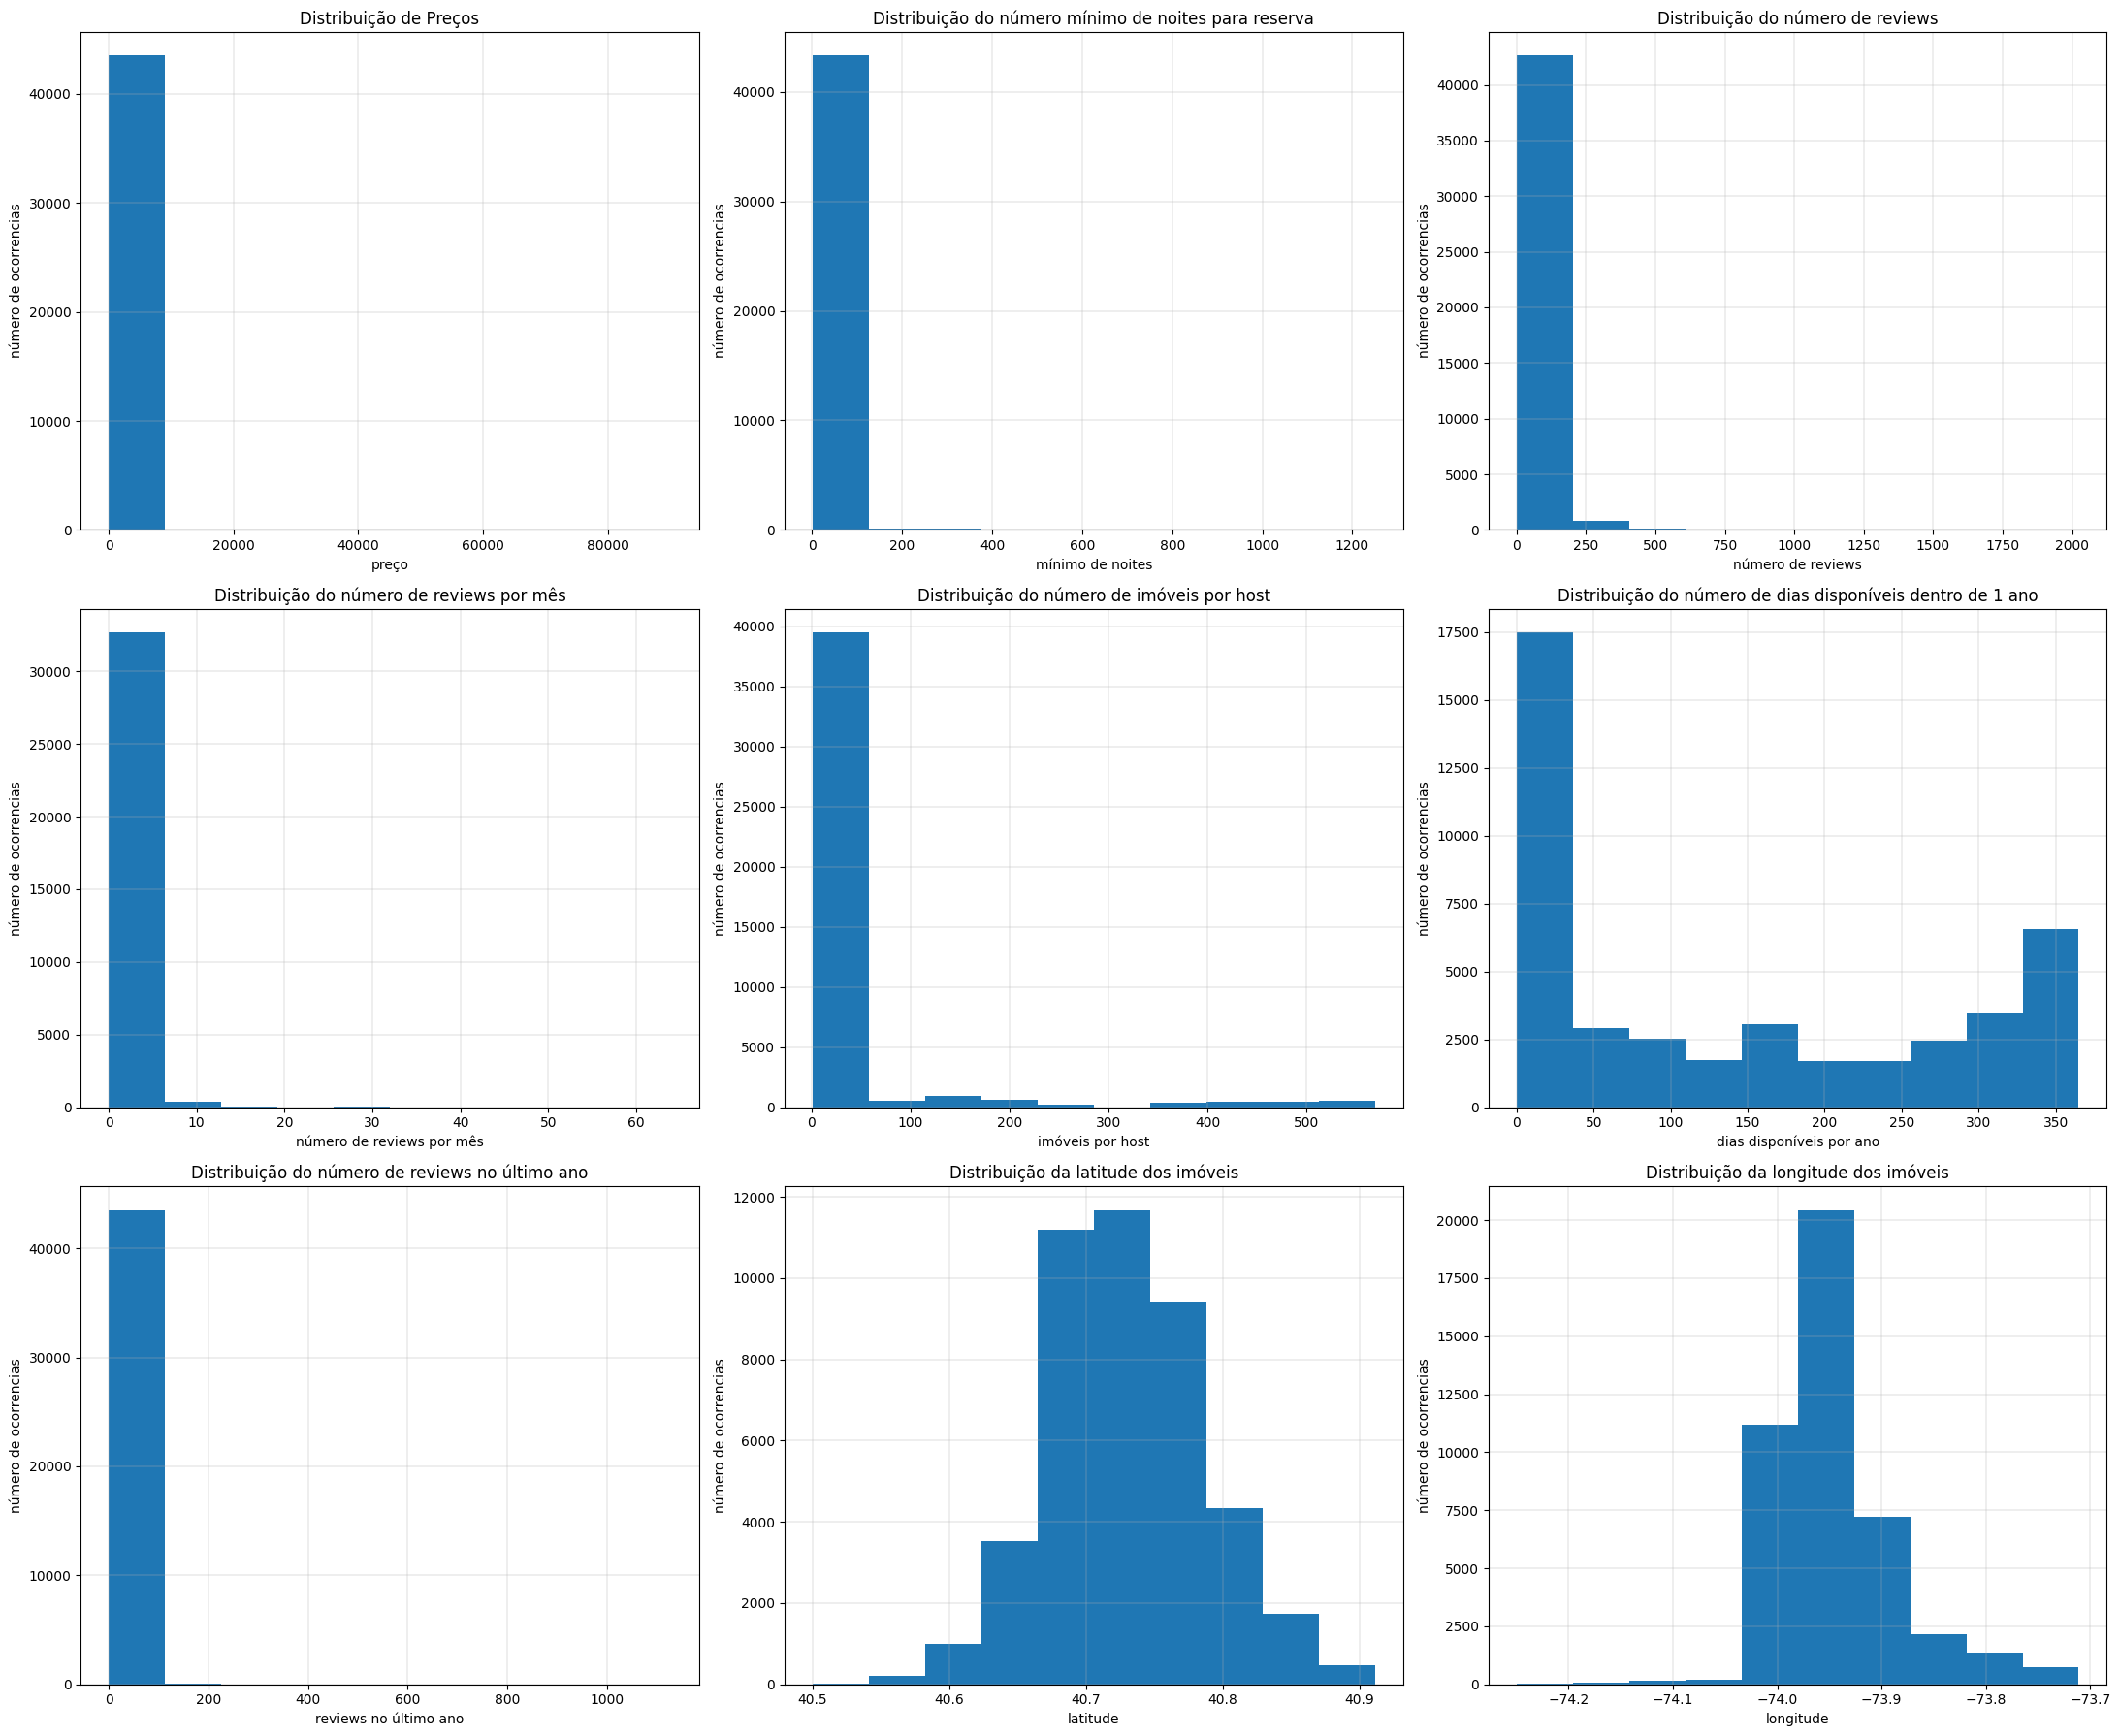

In [ ]:
# plotar o histograma das variáveis numéricas
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6),(ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3, figsize=(22, 18))

ax1.set_title('Distribuição de Preços')
ax1.set_ylabel('número de ocorrencias')
ax1.set_xlabel('preço')
ax1.grid( linestyle='-', linewidth=0.3)
ax1.hist(df['price'])


ax2.set_title('Distribuição do número mínimo de noites para reserva')
ax2.set_xlabel('mínimo de noites')
ax2.set_ylabel('número de ocorrencias')
ax2.grid( linestyle='-', linewidth=0.3)
ax2.hist(df['minimum_nights'])

ax3.set_title('Distribuição do número de reviews')
ax3.set_xlabel('número de reviews')
ax3.set_ylabel('número de ocorrencias')
ax3.grid( linestyle='-', linewidth=0.3)
ax3.hist(df['number_of_reviews'])

ax4.set_title('Distribuição do número de reviews por mês')
ax4.set_xlabel('número de reviews por mês')
ax4.set_ylabel('número de ocorrencias')
ax4.grid( linestyle='-', linewidth=0.3)
ax4.hist(df['reviews_per_month'])

ax5.set_title('Distribuição do número de imóveis por host')
ax5.set_xlabel('imóveis por host')
ax5.set_ylabel('número de ocorrencias')
ax5.grid( linestyle='-', linewidth=0.3)
ax5.hist(df['calculated_host_listings_count'])

ax6.set_title('Distribuição do número de dias disponíveis dentro de 1 ano')
ax6.set_xlabel('dias disponíveis por ano')
ax6.set_ylabel('número de ocorrencias')
ax6.grid( linestyle='-', linewidth=0.3)
ax6.hist(df['availability_365'])

ax7.set_title('Distribuição do número de reviews no último ano')
ax7.set_xlabel('reviews no último ano')
ax7.set_ylabel('número de ocorrencias')
ax7.grid( linestyle='-', linewidth=0.3)
ax7.hist(df['number_of_reviews_ltm'])

ax8.set_title('Distribuição da latitude dos imóveis')
ax8.set_xlabel('latitude')
ax8.set_ylabel('número de ocorrencias')
ax8.grid( linestyle='-', linewidth=0.3)
ax8.hist(df['latitude'])

ax9.set_title('Distribuição da longitude dos imóveis')
ax9.set_xlabel('longitude')
ax9.set_ylabel('número de ocorrencias')
ax9.grid( linestyle='-', linewidth=0.3)
ax9.hist(df['longitude'])

fig.tight_layout()

A partir do traçado das distribuições podemos observar que algumas delas estão distorcidas por conta, provavelmente, de alguns *outliers*, e é justamente isso que vamos analisar em seguida.

Definição de *outlier*: É um valor incomum que difere muito e distoa dos outros valores do conjunto de dados.


In [ ]:
# ver o resumo estatístico das variáveis
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,43566.000000,43566.000000,43566.000000,33070.000000,43566.000000,43566.000000
mean,225.216109,18.700271,26.368544,1.219748,30.934857,136.998256
std,818.738268,27.804388,57.740520,1.777084,99.108628,137.346191
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,80.000000,2.000000,1.000000,0.130000,1.000000,0.000000
50%,136.000000,15.000000,5.000000,0.550000,1.000000,89.000000
75%,228.000000,30.000000,24.000000,1.800000,5.000000,278.000000
max,90120.000000,1250.000000,2024.000000,63.950000,569.000000,365.000000


Com essa tabela de informações estatísticas podemos compreender melhor a quesçao dos outliers.

O problema fica bem desenhado quando olhamos, por exemplo, o valor máximo de cada varíavel e comparamos com o percentil 75%(valor abaixo do qual 75% dos dados em um conjunto estão localizados).

Para a variável `calculated_host_listings_count` podemos ver que o valor máximo de imóveis de um host é 569, porém 75% dos hosts tem 5 ou menos imóveis.

Outra observação ue podemos fazer é que o número máximo de `minimum_nights` é maior do que 365 dias = 1 ano.

Tendo observado os dados estatísticos vamos então plotar o "gráfico de caixa" para as variáveis mais relevantes

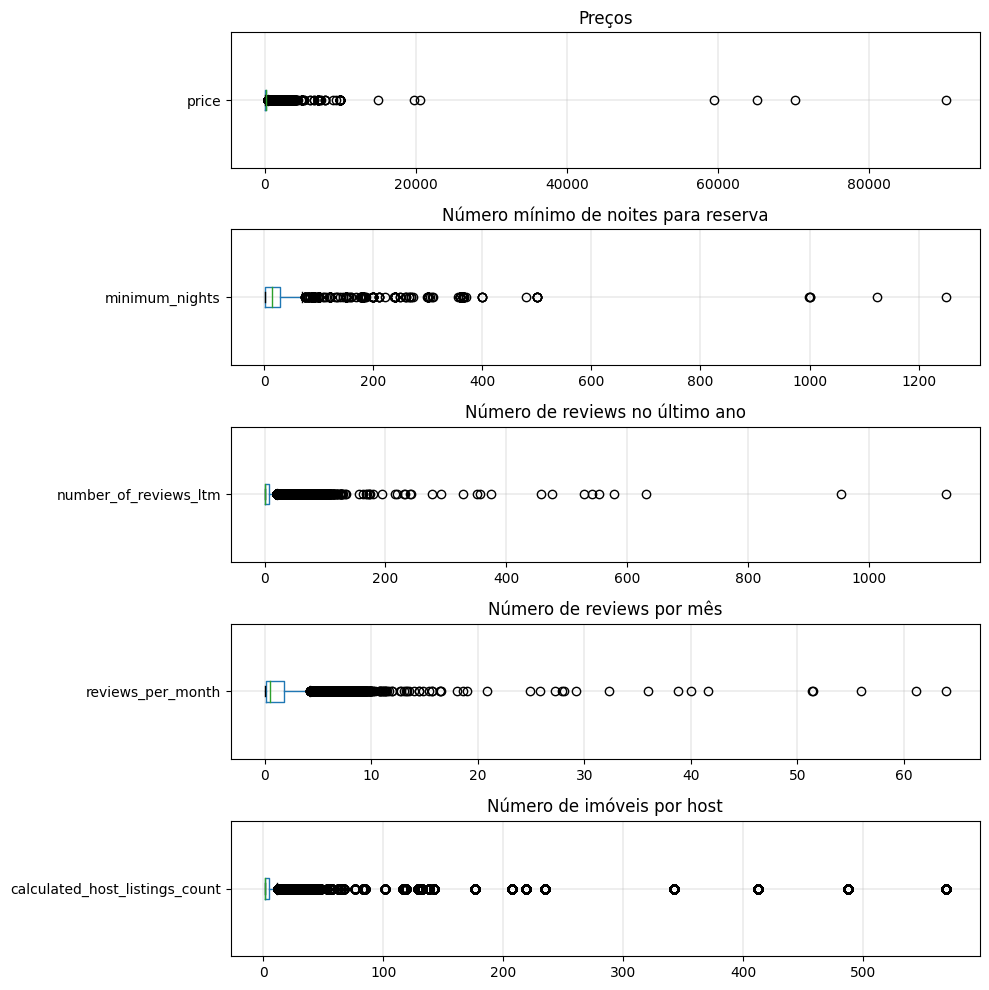

In [ ]:
fig, (ax1, ax2, ax3,ax4, ax5) = plt.subplots(nrows=5, ncols=1, figsize=(10, 10))

ax1.set_title('Preços')
ax1.grid( linestyle='-', linewidth=0.3)
df.boxplot(['price'], vert=False, ax=ax1)

ax2.set_title('Número mínimo de noites para reserva')
ax2.grid( linestyle='-', linewidth=0.3)
df.boxplot(['minimum_nights'], vert=False,ax=ax2)

ax4.set_title('Número de reviews por mês')
ax4.grid( linestyle='-', linewidth=0.3)
df.boxplot(['reviews_per_month'], vert=False,ax=ax4)

ax5.set_title('Número de imóveis por host')
ax5.grid( linestyle='-', linewidth=0.3)
df.boxplot(['calculated_host_listings_count'], vert=False,ax=ax5)

ax3.set_title('Número de reviews no último ano')
ax3.grid( linestyle='-', linewidth=0.3)
df.boxplot(['number_of_reviews_ltm'], vert=False,ax=ax3)

fig.tight_layout()

Com esses graficos traçados, podemos observar de fomra visual os outliers(pontos pretos) e assim corta-los do nosso *dataset*.

O critério do corte será o de que cada variável poderá ter no máximo 1% de seus daods removidos.

In [ ]:
print("Porcentagem de preços acima de 1,500 dólares: {:.4f}%".format(  (len(df[df.price > 1500]) / df.shape[0])*100))
print("Porcentagem de mínimo de noites para reserva acima de 90 noites: {:.4f}%".format(  (len(df[df.minimum_nights >90]) / df.shape[0])*100))
print("Porcentagem de reviews no último ano acima de 65 reviews : {:.4f}%".format(  (len(df[df.number_of_reviews_ltm > 65]) / df.shape[0])*100))
print("Porcentagem de reviews por mes acima de 7 reviews: {:.4f}%".format(  (len(df[df.reviews_per_month > 7]) / df.shape[0])*100))

Porcentagem de preços acima de 1,500 dólares: 0.9709%
Porcentagem de mínimo de noites para reserva acima de 90 noites: 0.7253%
Porcentagem de reviews no último ano acima de 65 reviews : 0.9985%
Porcentagem de reviews por mes acima de 7 reviews: 0.6634%


Agora que ajustamos o um limite para os outliers, vamos remove-los do dataset.

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 90].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.number_of_reviews_ltm > 65].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.reviews_per_month > 7].index, axis=0, inplace=True)


# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

E finalmente plotamos os gráficos das distribuições que agora passam informações mais claras do que antes.

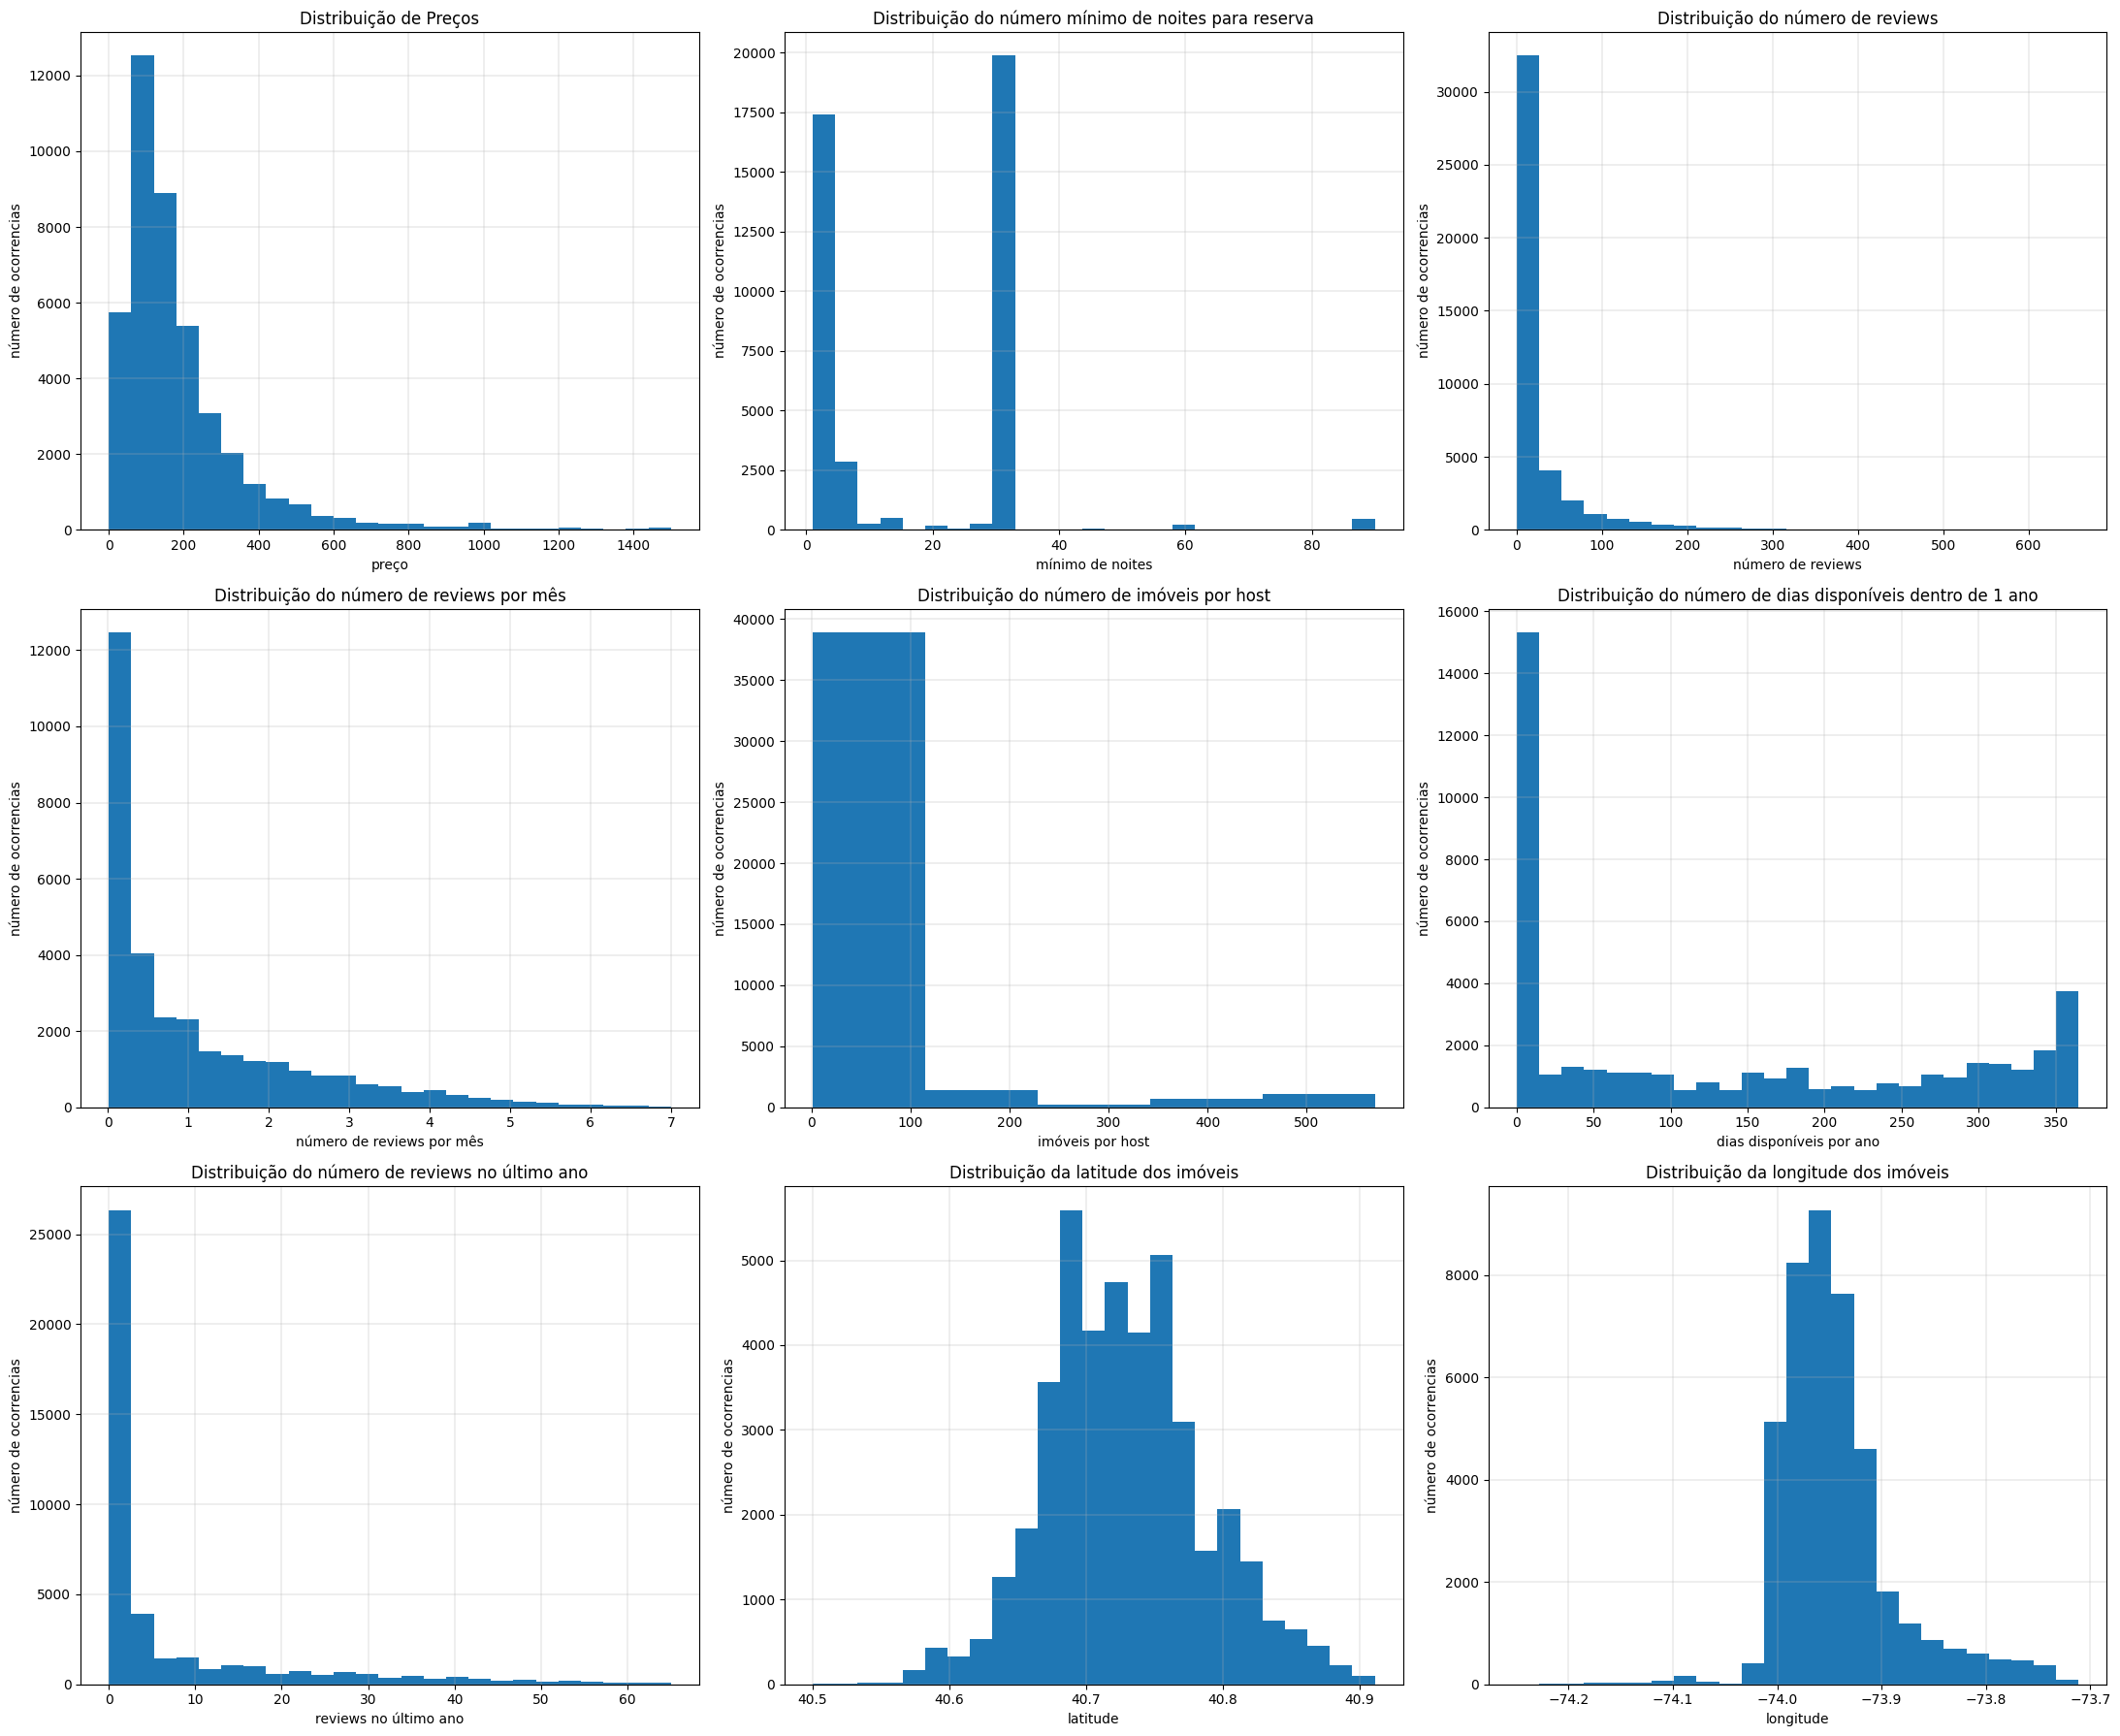

In [ ]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6),(ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3, figsize=(22, 18))

ax1.set_title('Distribuição de Preços')
ax1.set_ylabel('número de ocorrencias')
ax1.set_xlabel('preço')
ax1.grid( linestyle='-', linewidth=0.3)
ax1.hist(df_clean['price'],bins=25)


ax2.set_title('Distribuição do número mínimo de noites para reserva')
ax2.set_xlabel('mínimo de noites')
ax2.set_ylabel('número de ocorrencias')
ax2.grid( linestyle='-', linewidth=0.3)
ax2.hist(df_clean['minimum_nights'],bins=25)

ax3.set_title('Distribuição do número de reviews')
ax3.set_xlabel('número de reviews')
ax3.set_ylabel('número de ocorrencias')
ax3.grid( linestyle='-', linewidth=0.3)
ax3.hist(df_clean['number_of_reviews'],bins=25)

ax4.set_title('Distribuição do número de reviews por mês')
ax4.set_xlabel('número de reviews por mês')
ax4.set_ylabel('número de ocorrencias')
ax4.grid( linestyle='-', linewidth=0.3)
ax4.hist(df_clean['reviews_per_month'],bins=25)

ax5.set_title('Distribuição do número de imóveis por host')
ax5.set_xlabel('imóveis por host')
ax5.set_ylabel('número de ocorrencias')
ax5.grid( linestyle='-', linewidth=0.3)
ax5.hist(df_clean['calculated_host_listings_count'],bins=5)

ax6.set_title('Distribuição do número de dias disponíveis dentro de 1 ano')
ax6.set_xlabel('dias disponíveis por ano')
ax6.set_ylabel('número de ocorrencias')
ax6.grid( linestyle='-', linewidth=0.3)
ax6.hist(df_clean['availability_365'],bins=25)

ax7.set_title('Distribuição do número de reviews no último ano')
ax7.set_xlabel('reviews no último ano')
ax7.set_ylabel('número de ocorrencias')
ax7.grid( linestyle='-', linewidth=0.3)
ax7.hist(df_clean['number_of_reviews_ltm'],bins=25)

ax8.set_title('Distribuição da latitude dos imóveis')
ax8.set_xlabel('latitude')
ax8.set_ylabel('número de ocorrencias')
ax8.grid( linestyle='-', linewidth=0.3)
ax8.hist(df_clean['latitude'],bins=25)

ax9.set_title('Distribuição da longitude dos imóveis')
ax9.set_xlabel('longitude')
ax9.set_ylabel('número de ocorrencias')
ax9.grid( linestyle='-', linewidth=0.3)
ax9.hist(df_clean['longitude'],bins=25)

fig.tight_layout()

Além das distribuições podemos tirar da tabela de dados outras informações estatisticas interessantes.

Uma delas é a média de preços dos imóveis disponíveis.

In [ ]:
# ver a média da coluna 'price'
media = round(df_clean.price.mean(),2)
print('Média de preço dos imóveis: {}USD'.format(media))

Média de preço dos imóveis: 188.88USD


Outro tipo de informação relevante são as correlações que existem, ou não, entre as variáveis da tabela.

Abaixo podemos conferir a matriz de correlações da tabela que estamos trabalhando.  

In [ ]:
# criar uma matriz de correlação
df_corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
df_corr


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.174451,-0.041650,0.050601,0.099066,0.143100
minimum_nights,-0.174451,1.000000,-0.226704,-0.500338,0.277995,-0.137433
number_of_reviews,-0.041650,-0.226704,1.000000,0.477386,-0.132297,0.045201
reviews_per_month,0.050601,-0.500338,0.477386,1.000000,-0.106728,0.231536
calculated_host_listings_count,0.099066,0.277995,-0.132297,-0.106728,1.000000,0.100647
availability_365,0.143100,-0.137433,0.045201,0.231536,0.100647,1.000000


Para melhorar a vizualização destas informações vamos traçar um gráfico do tipo *heatmap*.

<Axes: >

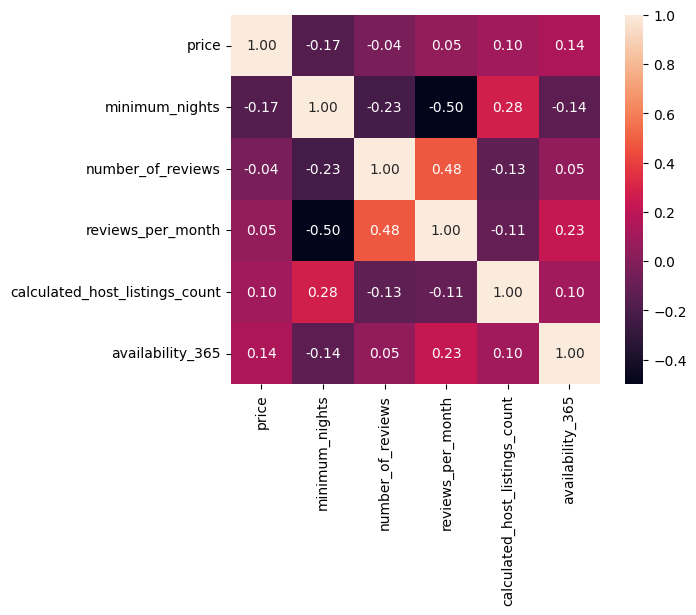

In [ ]:
# plotar um heatmap a partir das correlações
fig, ax = plt.subplots()
sns.heatmap(df_corr, fmt='.2f',square=True,vmax=1.0,annot=True)



A seguir vamos verificar qual tipo de imóvel mais alugado no Airbnb.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    23876
Private room       17694
Shared room          569
Hotel room           138
Name: room_type, dtype: int64

Podemos obter essa informação também na forma de porcentagem, ou seja, quanto cada tipo de imóvel representa em relação ao todo.

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts()/df_clean.shape[0]

Entire home/apt    0.564752
Private room       0.418525
Shared room        0.013459
Hotel room         0.003264
Name: room_type, dtype: float64

Agora vamos tentar vizualizar as localidades pela sua media de preços dos imóveis ofertados.


In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[0:60]

neighbourhood
Fort Wadsworth        800.000000
Theater District      511.041783
Tribeca               485.690217
SoHo                  412.203390
Flatiron District     364.231481
Midtown               362.831288
Financial District    351.278505
Belle Harbor          339.000000
Murray Hill           320.435666
NoHo                  307.315789
DUMBO                 306.480000
Chelsea               301.012723
Todt Hill             299.000000
Neponsit              295.000000
Downtown Brooklyn     291.455882
West Village          287.438384
Greenwich Village     283.088372
Navy Yard             281.250000
Little Italy          278.264706
Civic Center          276.000000
Hell's Kitchen        275.881830
Cobble Hill           265.188406
Willowbrook           264.000000
Gowanus               263.497207
Bull's Head           262.333333
Vinegar Hill          257.200000
Tottenville           255.750000
Battery Park City     253.298701
Eltingville           252.250000
Boerum Hill           250.593

Observação importante: É preciso ter cuidado na hora de fazer esse tipo de comparação, pois não temos o mesmo número de imóveis para todos os bairros e, com isso, distorções podem ocorrer. Como sabemos, quanto mais dados sobre a oferta de preço de um produto, e mais uniformes forem os valores ofertados, mais a média dos valores reflete a realidade sobre o preço médio daquele produto.

Isso não é diferente nesta situação de ofertas de apartamentos via Airbnb. Como podemos observar abaixo, a localidade que seria indicada como a mais cara possui apenas uma entrada na tabela e isso, a priori, não reflete nenhuma informação sobre o panorama imbiliário do local.


In [ ]:
#Exibir todas as linhas da tabela da localidade 'Fort Wadsworth'
df_clean[df_clean.neighbourhood == "Fort Wadsworth"]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
11003,20305160,Home in Staten Island · 5 bedrooms · 5 beds · ...,1715301,Mark,Fort Wadsworth,40.59324,-74.0608,Entire home/apt,800,30,0,NaN,NaN,3,365,0,NaN


Outra alternativa para esse mesmo tipo de análise, que inclusive permite a interpretação dos dados de maneira mais visual e intuitiva, pode ser a partir do traçado do gráfico a seguir que relaciona a posição geográfica do imóvel(latitude e longitude nos eixos) com seu preço(representado pela cor de cada "bolinha".)

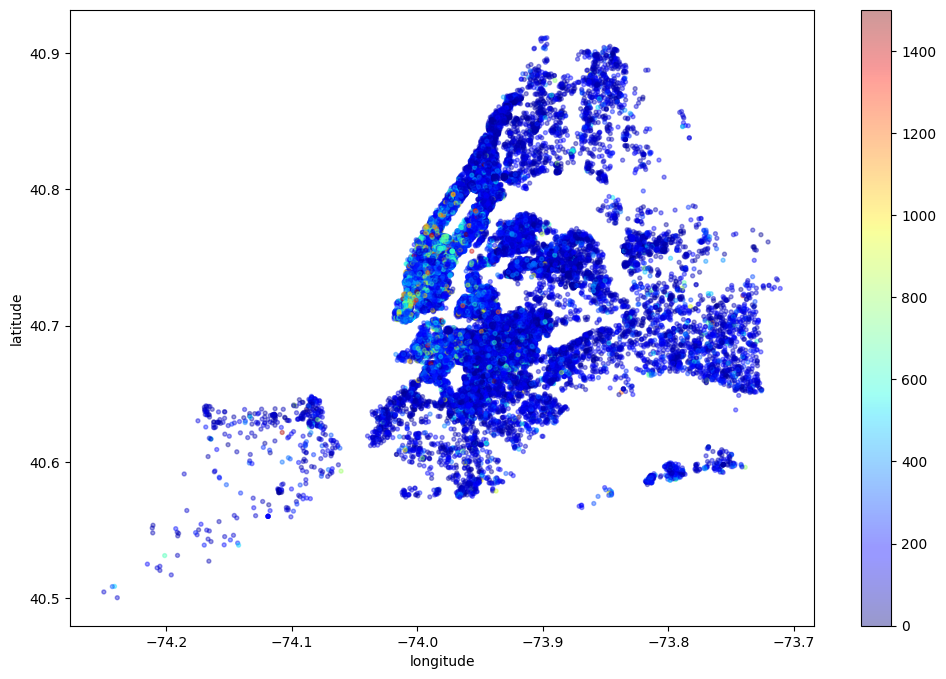

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

<img alt="Analisando Airbnb" width="97%" src="https://lovingnewyork.com.br/wp-content/uploads/2018/11/como-chegar-em-nova-york-bairros.jpg"></center>


Comparando com o mapa, é possível observar que a mioria dos imóveis se encontram nas regiões do Brooklyn e de Manhattan, sendo que os mais caros se encontram na região mais ao sul de Manhattan(maior concentração de pontos claros) que fica próximo ao Central Park e estátua da liberadade.

## Conclusões


A análise feita neste notebook é relativamente superficial e nos forrnece apenas um panorama inicial sobre as imóveis disponíveis no Airbnb na cidade ne Nova Iorque.

Entretanto, pudemos observar alguns pontos de atenção que devem ser levados em consideração em caso de uma análise mais extensa e minuciosa. Um deles é a presença de *outliers* que existem para varias das variáveis presentes no dataset e acabvam por distocer algumas análises.

Outro ponto de atenção foi a irregularidade do número de dados para cada região que surtem efeitos parecidos de distorção da análise qunado negligenciados ou não detectados.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.